# Flare hands on tutorial

The hands-on sessions are designed to be informal and interactive. 

Prticipants will work directly with the data, with the team leads available for questions, support, and discussion.

People can engage at different depths depending on their background and interest:
- some participants may explore a dataset in more detail and try extended analysis
- others may focus on getting started and understanding the core tools and workflows




## Flare: 2025-01-19 03:30 UT
For this flare session, we will analyse an M-class solar flare from 19-Jan-2025 at ~ 03:30. 
This flare was observed by both Aditya-L1 andd Solar Orbiter. We will analyse this flare using 
- Solar Orbiter/STIX
- Solar Orbiter/EUI
- Aditya-L1/HEL1OS
- Aditya-L1/SoLEXS
- Aditya-L1/SUIT

This notebook is just a starting point! Please run with it. We've set some tasks to do!

![img](overview_flare.jpeg)

Note that this notebook also includes downloading the data - but also requires some locally. All the data in this notebook is available here: https://drive.google.com/drive/u/1/folders/1czUWf8y9TWfrYXVf4jA52ZFB8LzUaHlp

## Use what you've seen in the tutorial sessions: 
https://github.com/ISRO-ESA-Heliophysics-Workshop/hands-on-materials/


## This is just a starting notebook. Here are some tasks and some things to try:
- Plot the locations of the spacecraft (e.g. Earth and Solar Orbiter)

Timeseries: 
- Plot the quicklook lightcurves of STIX
- Find the time delay between the STIX and Earth observations
- Plot the SolEXS lightcurves and the HEL1Os lightcurves

Imaging Observations:
- Search for EUI data (or download from the google drive) and plot the image as a sunpy map.
- Plot the EUI image and make a submap over the region of interest.
- Plot the SUIT images (of the decay phase, SUIT missed the start of this flare)
- Create a STIX image using STIXpy


In [5]:
# uncomment below if using google colab
## !pip -q install -r https://raw.githubusercontent.com/ISRO-ESA-Heliophysics-Workshop/hands-on-materials/refs/heads/main/science-workflows/01_flares_multimission/requirements.txt

In [1]:
import sunpy_soar
from sunpy.net import Fido, attrs as a 
import matplotlib.pyplot as plt
from astropy import units as u 

from sunpy import timeseries as ts
from stixpy import timeseries
import stixpy.net 
import sunpy.map
from astropy.coordinates import SkyCoord
import glob
import pandas as pd

# 1.  Lets start by plotting the flare  as observed by GOES/XRS

In [3]:
tstart = "2025-01-19 03:20"
tend = "2025-01-19 04:00"

Lets start by searching for the GOES/XRS data using Fido. 

In [9]:
res = Fido.search(a.Time(tstart, tend), 
                  a.Instrument.xrs, 
                  a.Resolution.flx1s, 
                  a.goes.SatelliteNumber(16))

Lets download this data into the current directory

In [10]:
Fido.fetch(res, path="./")

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['sci_xrsf-l2-flx1s_g16_d20250119_v2-2-0.nc']

Now we have this data, lets read it into a sunpy timeseries and plot!

<Axes: ylabel='Watts m$^{-2}$'>

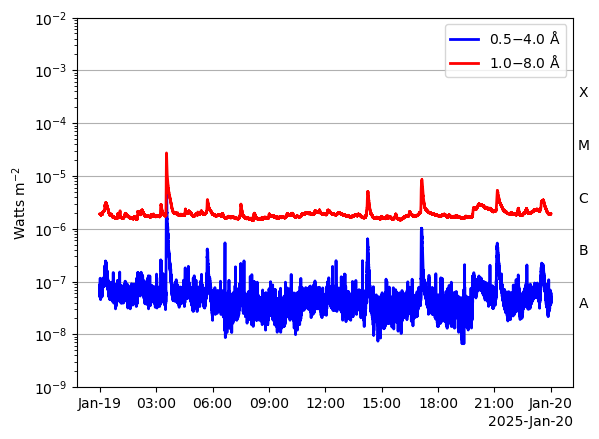

In [11]:
goes_ts = ts.TimeSeries('sci_xrsf-l2-flx1s_g16_d20250119_v2-2-0.nc')
goes_ts.plot()

lets now zoom in and crop for the region of interest:

<Axes: ylabel='Watts m$^{-2}$'>

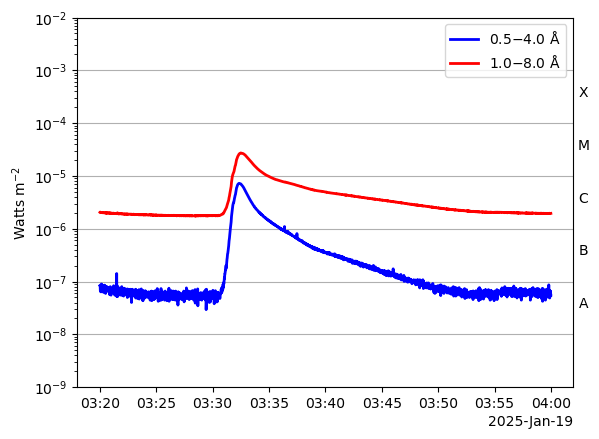

In [13]:
goes_flare = goes_ts.truncate(tstart, tend)
goes_flare.plot()

## 2. TASK: Now we want to check where Solar Orbiter was with respect to each, lets plot the positions of the spacecraft!

## 3. Lets get some STIX data!

In [16]:
stix_res = Fido.search(a.Time("2025-01-19", "2025-01-19 23:00"), 
                       a.Instrument.stix, a.soar.Product.stix_ql_lightcurve)
Fido.fetch(stix_res, path="./")

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['solo_L1_stix-ql-lightcurve_20250119_V02.fits']

<Axes: title={'center': 'STIX QL Light Curve'}, xlabel='time', ylabel='ct / (keV s)'>

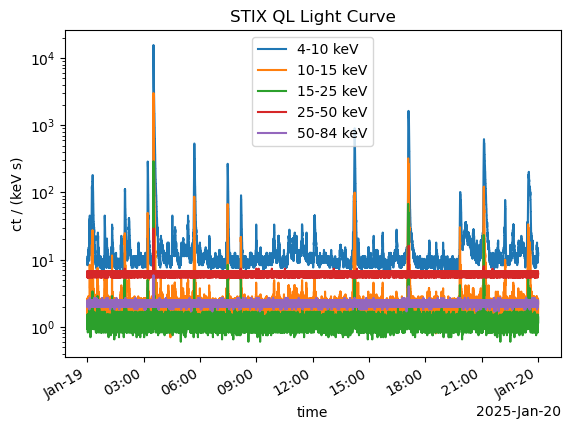

In [24]:
stix_ts = ts.TimeSeries('solo_L1_stix-ql-lightcurve_20250119_V02.fits')
stix_ts.plot()

In [22]:
stix_flare = stix_ts.truncate(tstart, tend)

<Axes: title={'center': 'STIX QL Light Curve'}, xlabel='time', ylabel='ct / (keV s)'>

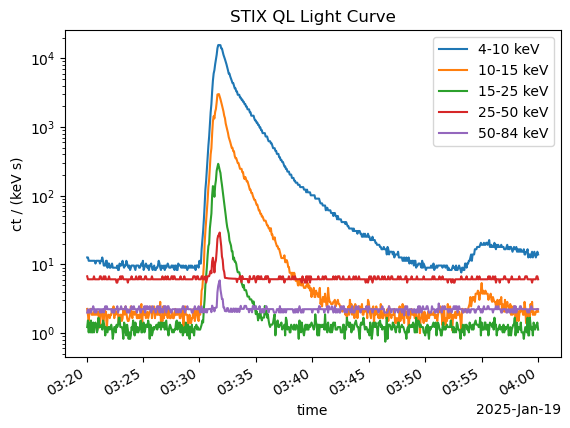

In [23]:
stix_flare.plot()

In [27]:
solo_earth_timedelay = stix_flare.meta.metas[0]["EAR_TDEL"]

In [29]:
solo_earth_timedelay

33.5793551182436

## Search for some EUI data

In [30]:
res = Fido.search(a.Time(tstart, tend), 
                  a.soar.Product.eui_fsi304_image, a.Level(2), a.Provider.soar)

In [32]:
Fido.fetch(res, path="./")

Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

solo_L2_eui-fsi304-image_20250119T033020238_V01.fits:   0%|          | 0.00/4.51M [00:00<?, ?B/s]

solo_L2_eui-fsi304-image_20250119T034220239_V01.fits:   0%|          | 0.00/4.17M [00:00<?, ?B/s]

solo_L2_eui-fsi304-image_20250119T033620239_V01.fits:   0%|          | 0.00/3.60M [00:00<?, ?B/s]

solo_L2_eui-fsi304-image_20250119T032420237_V01.fits:   0%|          | 0.00/5.01M [00:00<?, ?B/s]

solo_L2_eui-fsi304-image_20250119T034820240_V01.fits:   0%|          | 0.00/4.46M [00:00<?, ?B/s]

solo_L2_eui-fsi304-image_20250119T035420241_V01.fits:   0%|          | 0.00/4.51M [00:00<?, ?B/s]

['solo_L2_eui-fsi304-image_20250119T032420237_V01.fits', 'solo_L2_eui-fsi304-image_20250119T033020238_V01.fits', 'solo_L2_eui-fsi304-image_20250119T033620239_V01.fits', 'solo_L2_eui-fsi304-image_20250119T034220239_V01.fits', 'solo_L2_eui-fsi304-image_20250119T034820240_V01.fits', 'solo_L2_eui-fsi304-image_20250119T035420241_V01.fits']

## TASK : make an EUI map and make a submap over the region of interest